<a href="https://colab.research.google.com/github/A01647070/Semana_6/blob/main/PLATANOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

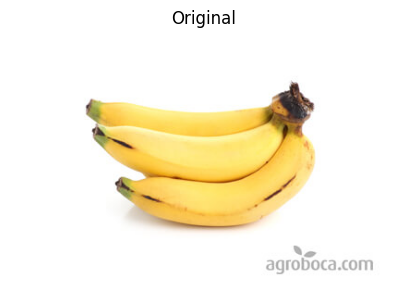

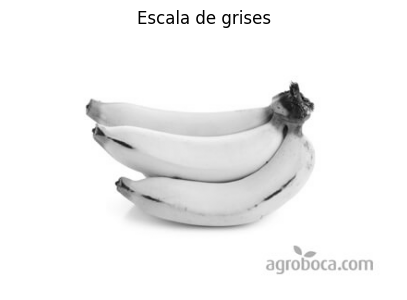

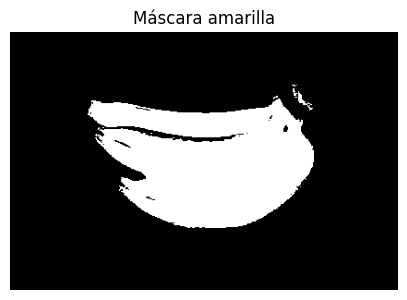

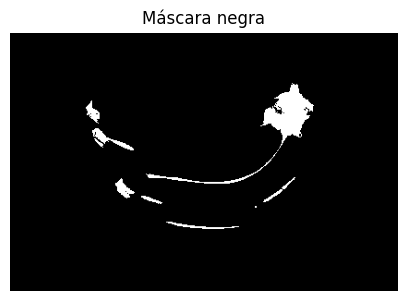

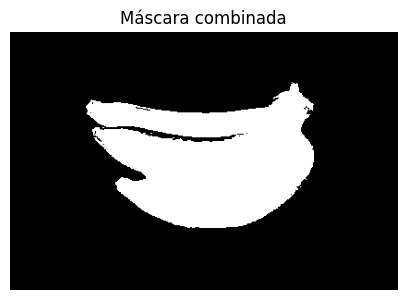

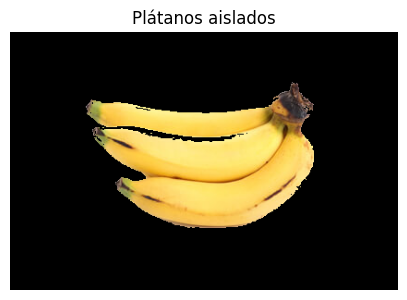

Número de pixeles amarillos: 23666 (95.82%)
Número de pixeles negros: 3088 (12.50%)
Estado: Plátano maduro


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("Platano_2.jpg")

plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')
plt.show()

# Imagen en HSV para la máscara amarilla
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Valores de amarillo (tolerancia a narnaja y café)
lower_yellow = np.array([0, 100, 80])
upper_yellow = np.array([360, 255, 255])

# Máscara amarilla
mask_yellow = cv2.inRange(hsv_img, lower_yellow, upper_yellow)

# Imagen en escala de grises para la máscara negra
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(5, 5))
plt.imshow(gray_img, cmap='gray')
plt.title("Escala de grises")
plt.axis('off')
plt.show()

# Valores para negro
lower_black_gray = 0
upper_black_gray = 150 # Tolerancia a grises oscuros

# Máscara negra
_, mask_black = cv2.threshold(gray_img, upper_black_gray, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(5, 5))
plt.imshow(mask_yellow, cmap='gray')
plt.title("Máscara amarilla")
plt.axis('off')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(mask_black, cmap='gray')
plt.title("Máscara negra")
plt.axis('off')
plt.show()

# Combinar las máscaras amarilla y negra
combined_mask = cv2.bitwise_or(mask_yellow, mask_black)

plt.figure(figsize=(5, 5))
plt.imshow(combined_mask, cmap='gray')
plt.title("Máscara combinada")
plt.axis('off')
plt.show()

# Aplicar la máscara combinada a la imagen original
result = cv2.bitwise_and(img, img, mask=combined_mask)

plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Plátanos aislados")
plt.axis('off')
plt.show()

# Contar pixeles de las máscaras
yellow_pixel_count = np.count_nonzero(mask_yellow)
black_pixel_count = np.count_nonzero(mask_black)
total_pixels = np.count_nonzero(combined_mask)

# Calcular porcentajes
total_pixels_percent = (total_pixels / total_pixels) * 100
yellow_percent = (yellow_pixel_count / total_pixels) * 100
black_percent = (black_pixel_count / total_pixels) * 100

print(f"Número de pixeles amarillos: {yellow_pixel_count} ({yellow_percent:.2f}%)")
print(f"Número de pixeles negros: {black_pixel_count} ({black_percent:.2f}%)")

# Categorización
if black_percent < 20:
    print("Estado: Plátano maduro")
elif 20 <= black_percent <= 60:
    print("Estado: Plátano muy maduro")
else:
    print("Estado: Plátano pasado de maduro")